In [3]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

#Define Structure of HS 1-component Systems, with PY closure, analytic#
# phi - packing fraction
# k - wavevector space
#*********************************************************************#
def a0(phi):
    return (1+2*phi)**2/(1-phi)**4

def a1(phi):
    return -6*phi*(1+phi/2)**2/(1-phi)**4

def a2(phi):
    return phi*a0(phi)/2

def C(phi,k):
    c1=-2.0*np.pi/(k**6*(1 - phi)**4)*(6.0*phi*(4.0*(1 + 2.0*phi)**2 + k**2*(2.0 + phi)**2) - (24.0*phi*(1.0 + 2.0*phi)**2 - 6.0*phi*(-2.0 + phi*(4.0 + 7.0*phi))*k**2 + (1.0 - phi)**2*(2.0 + phi)*k**4)*np.cos(k) +2.0*k*(-12.0*phi*(1.0 + 2.0*phi)**2 + (1.0 - 6.0*phi + 5.0*phi**3)*k**2)*np.sin(k))
    return c1            

def S(phi,k):
    return 1/(1 - 6.0*phi/(np.pi)*C(phi,k))


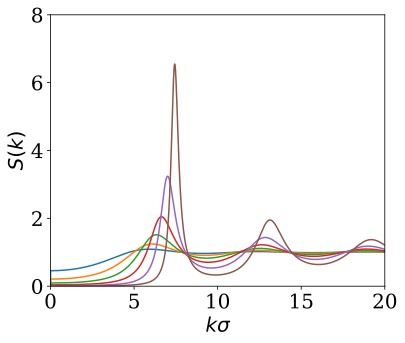

In [17]:
plt.figure(figsize=(6,5))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 20}
plt.rc('font', **font)

kmin=0.0001
kmax=30

kres=0.005

k = np.arange(kmin, kmax, kres)

phi=[0.10,0.20,0.30,0.40,0.50,0.60]
for i in range(len(phi)):
    plt.plot(k,S(phi[i],k))


plt.xlim([0, 20])
plt.ylim([0, 8])


plt.ylabel(r'$S(k)$')
plt.xlabel(r'$k\sigma$')
plt.show()

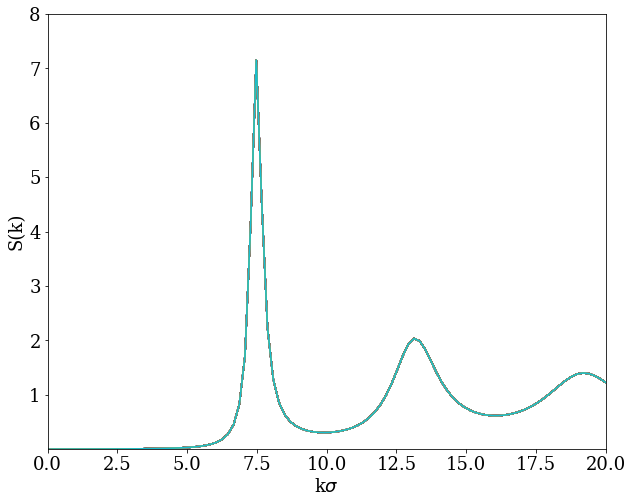

In [21]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

phi=0.61
for i in range(0,100):
    k=np.linspace(0.00001,20,100)
    R2=S(phi,k)
    plt.plot(k,R2,'-')
    
plt.ylim((0.01, 8))
plt.xlim((0, 20))
plt.ylabel('S(k)')
plt.xlabel(r'k$\sigma$')
plt.tight_layout
plt.show()

In [18]:
from scipy import integrate as integrate
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

#Define Structure of HS 1-component Systems, with PY closure, analytic#
# phi - packing fraction
# k - wavevector space
#*********************************************************************#
def a0(phi):
    return (1+2*phi)**2/(1-phi)**4

def a1(phi):
    return -6*phi*(1+phi/2)**2/(1-phi)**4

def a2(phi):
    return phi*a0(phi)/2

def C(phi,k):
    c1=-2.0*np.pi/(k**6*(1 - phi)**4)*(6.0*phi*(4.0*(1 + 2.0*phi)**2 + k**2*(2.0 + phi)**2) - (24.0*phi*(1.0 + 2.0*phi)**2 - 6.0*phi*(-2.0 + phi*(4.0 + 7.0*phi))*k**2 + (1.0 - phi)**2*(2.0 + phi)*k**4)*np.cos(k) +2.0*k*(-12.0*phi*(1.0 + 2.0*phi)**2 + (1.0 - 6.0*phi + 5.0*phi**3)*k**2)*np.sin(k))
    return c1            

def S(phi,k):
    return 1/(1 - 6.0*phi/(np.pi)*C(phi,k))

def fdyn(phi,r):
    k=[0]*10000
    f=[0]*10000
    for j in range(1,10000):
        k[j]=0.01*j
        f[j]=f[j-1]-(3.0*phi/((np.pi)**3.0))*k[j]**2.0*(C(phi,k[j])**2.0)*S(phi,k[j])*np.exp(-k[j]**2.0*r[i]**2.0*(1+1/S(phi,k[j]))/6.0)/(1+1/S(phi,k[j]))
        return 1.5*np.log(1.5/r[i]**2.0)+0.01*f[9999]
    

phi=0.61
r=[0]*600
fdyn=[0]*600
k=[0]*10000
f=[0]*10000
for i in range(0,600):
    r[i]=0.001+0.001*i
    #f[0]=0
    for j in range(1,10000):
        k[j]=0.01*j
        f[j]=f[j-1]-(3.0*phi/((np.pi)**3.0))*k[j]**2.0*(C(phi,k[j])**2.0)*S(phi,k[j])*np.exp(-k[j]**2.0*r[i]**2.0*(1+1/S(phi,k[j]))/6.0)/(1+1/S(phi,k[j]))
    fdyn[i]=1.5*np.log(1.5/r[i]**2.0)+0.01*f[9999]
   # print(fdyn[i])    
 

KeyboardInterrupt: 

In [19]:
phi=0.61
r=[0]*600
fdyn=[0]*600
k=[0]*10000
f=[0]*10000
for i in range(0,600):
    r[i]=0.001+0.001*i
    #f[0]=0
    for j in range(1,10000):
        k[j]=0.01*j
        f[j]=f[j-1]-(3.0*phi/((np.pi)**3.0))*k[j]**2.0*(C(phi,k[j])**2.0)*S(phi,k[j])*np.exp(-k[j]**2.0*r[i]**2.0*(1+1/S(phi,k[j]))/6.0)/(1+1/S(phi,k[j]))
    fdyn[i]=1.5*np.log(1.5/r[i]**2.0)+0.01*f[9999]

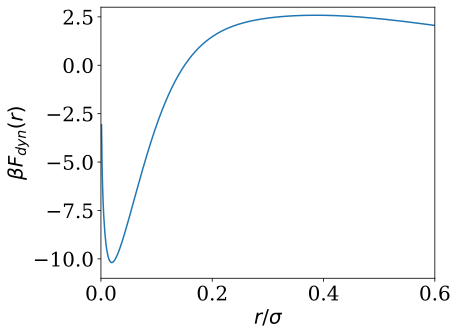

In [26]:
plt.figure(figsize=(6,5))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 20}
plt.rc('font', **font)

plt.plot(r,fdyn)

plt.xlim([0, 0.60])
plt.ylim([-11, 3])


plt.ylabel(r'$\beta F_{dyn}(r)$')
plt.xlabel(r'$r/\sigma$')
plt.show()

In [34]:
fdyn(0.61,0.02)

-10.187093466952275

In [27]:
fdiff=[0]*600
fm=0
print('packing fraction =',phi)
for i in range(2,600):
    fdiff[i]=fdyn[i]-fdyn[i-1]
    if (fdiff[i-1]>0) and (fdiff[i]<0):
        rB=i*0.001
        f_rB=fdyn[i]
        frb_p=fdyn[i+1]
        frb_m=fdyn[i-1]
        print('barrier location =',rB)
    if (fdiff[i-1]<0) and (fdiff[i]>0):
        rL=i*0.001
        f_rL=fdyn[i]
        frl_p=fdyn[i+1]
        frl_m=fdyn[i-1]
        print('localization length =',rL)
fB=f_rB-f_rL    
import math
print('local barrier=',fB)
#plt.plot(r,fdiff)
K0=(frl_p+frl_m-2.0*f_rL)/(0.001*0.001)
KB=(frb_p+frb_m-2.0*f_rB)/(0.001*0.001)
#print(K0,KB)
tau_NLE=2.0*np.pi/(math.sqrt(K0*(-KB)))*math.exp(fB)
print('NLE relaxation time =',tau_NLE)
r_c=1.50
deltar=3.0*(rB-rL)**2/(32.0*r_c)
fE=12.0*phi*K0*(r_c**3)*deltar**2
print('elastic barrier =',fE)
tau_ECNLE=tau_NLE*math.exp(fE)
print('ECNLE relaxation time =',tau_ECNLE)

packing fraction = 0.61
localization length = 0.019
barrier location = 0.386
local barrier= 12.771042212036075
NLE relaxation time = 3784.0347870003893
elastic barrier = 18.1962493881739
ECNLE relaxation time = 302333186124.8187


In [31]:
from scipy import integrate as integrate
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

#Define Structure of HS 1-component Systems, with PY closure, analytic#
# phi - packing fraction
# k - wavevector space
#*********************************************************************#
def a0(phi):
    return (1+2*phi)**2/(1-phi)**4

def a1(phi):
    return -6*phi*(1+phi/2)**2/(1-phi)**4

def a2(phi):
    return phi*a0(phi)/2

def C(phi,k):
    c1=-2.0*np.pi/(k**6*(1 - phi)**4)*(6.0*phi*(4.0*(1 + 2.0*phi)**2 + k**2*(2.0 + phi)**2) - (24.0*phi*(1.0 + 2.0*phi)**2 - 6.0*phi*(-2.0 + phi*(4.0 + 7.0*phi))*k**2 + (1.0 - phi)**2*(2.0 + phi)*k**4)*np.cos(k) +2.0*k*(-12.0*phi*(1.0 + 2.0*phi)**2 + (1.0 - 6.0*phi + 5.0*phi**3)*k**2)*np.sin(k))
    return c1            

def S(phi,k):
    return 1/(1 - 6.0*phi/(np.pi)*C(phi,k))

def fdyn(phi,r):
    k=[0]*10000
    f=[0]*10000
    for j in range(1,10000):
        k[j]=0.01*j
        f[j]=f[j-1]-(3.0*phi/((np.pi)**3.0))*k[j]**2.0*(C(phi,k[j])**2.0)*S(phi,k[j])*np.exp(-k[j]**2.0*r**2.0*(1+1/S(phi,k[j]))/6.0)/(1+1/S(phi,k[j]))   
    return 1.5*np.log(1.5/r**2.0)+0.01*f[9999]

KeyboardInterrupt: 

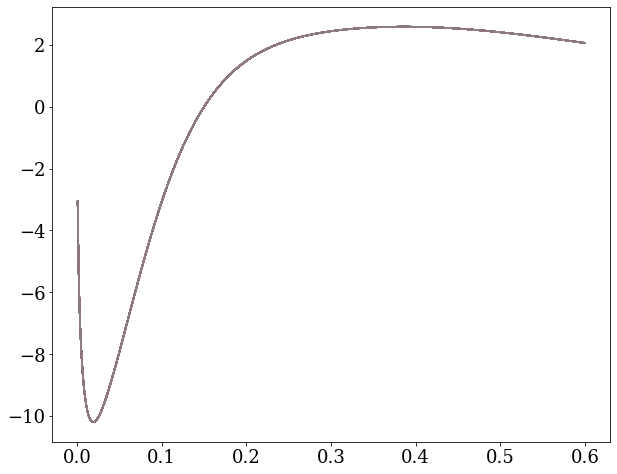

In [30]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

phi=0.61
for i in range(0,600):
    r=np.linspace(0.001,0.60,600)
    R2=fdyn(phi,r)
    plt.plot(r,R2,'-')

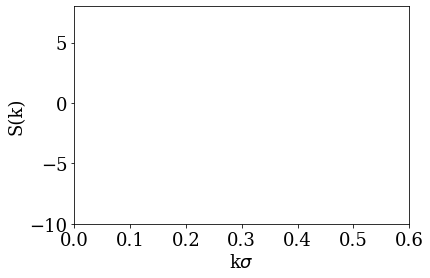

In [23]:
plt.ylim((-10, 8))
plt.xlim((0, 0.60))
plt.ylabel('S(k)')
plt.xlabel(r'k$\sigma$')
plt.tight_layout
plt.show()